### Loading the data in Python

In [1]:
import h5py
import numpy as np
import pandas as pd
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# Define a function to load the data from the hdf5 file
def load_h5py_file(file_path):
    data = {
        'neural_features': [],
        'n_time_steps': [],
        'seq_class_ids': [],
        'seq_len': [],
        'transcriptions': [],
        'sentence_label': [],
        'session': [],
        'block_num': [],
        'trial_num': [],
    }
    # Open the hdf5 file for that day
    with h5py.File(file_path, 'r') as f:

        keys = list(f.keys())

        # For each trial in the selected trials in that day
        for key in keys:
            g = f[key]

            neural_features = g['input_features'][:]
            n_time_steps = g.attrs['n_time_steps']
            seq_class_ids = g['seq_class_ids'][:] if 'seq_class_ids' in g else None
            seq_len = g.attrs['seq_len'] if 'seq_len' in g.attrs else None
            transcription = g['transcription'][:] if 'transcription' in g else None
            sentence_label = g.attrs['sentence_label'][:] if 'sentence_label' in g.attrs else None
            session = g.attrs['session']
            block_num = g.attrs['block_num']
            trial_num = g.attrs['trial_num']

            data['neural_features'].append(neural_features)
            data['n_time_steps'].append(n_time_steps)
            data['seq_class_ids'].append(seq_class_ids)
            data['seq_len'].append(seq_len)
            data['transcriptions'].append(transcription)
            data['sentence_label'].append(sentence_label)
            data['session'].append(session)
            data['block_num'].append(block_num)
            data['trial_num'].append(trial_num)
    return data


In [3]:
DATA_PATH = 'data/t15_copyTask_neuralData/hdf5_data_final'

# Recursively search for all *train.hdf5 files under all subdirectories of DATA_PATH
def get_data_files(data_type='train'):
    """
    Return a list of files matching the given data type ('train', 'valid', or 'test').
    """
    return glob.glob(os.path.join(DATA_PATH, '**', f'*{data_type}.hdf5'), recursive=True)

In [4]:
train_files = get_data_files('train')
train_files

['data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.11.03/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.11.04/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.09.01/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2025.03.14/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2024.05.10/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2024.04.28/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2024.03.08/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2024.03.15/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2025.01.10/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.10.20/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.08.13/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data_final/t15.2023.08.25/data_train.hdf5',
 'data/t15_copyTask_neuralData/hdf5_data

In [5]:
# Load all data into a single DataFrame
def load_data(files):
    df = pd.DataFrame()

    for file in tqdm(files, desc="Loading data"):
        data = load_h5py_file(file)
        df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
    return df


In [6]:
train_df = load_data(train_files)

Loading data: 100%|██████████| 45/45 [00:57<00:00,  1.27s/it]


In [7]:
train_df.head()

,neural_features,n_time_steps,seq_class_ids,seq_len,transcriptions,sentence_label,session,block_num,trial_num
0,"[[-0.23488846, 0.5014211, -0.75813776, -0.5213...",544,"[6, 40, 36, 17, 21, 40, 15, 25, 40, 12, 5, 23,...",14,"[73, 32, 119, 105, 108, 108, 32, 103, 111, 32,...",I will go around.,t15.2023.11.03,1,0
1,"[[-0.23703846, 0.3616628, -0.7747983, 0.937466...",641,"[6, 40, 2, 22, 40, 31, 4, 20, 17, 24, 40, 31, ...",24,"[73, 32, 97, 109, 32, 116, 97, 108, 107, 105, ...",I am talking to my family.,t15.2023.11.03,1,1
2,"[[-0.23900536, -0.8310198, -0.75461406, -0.489...",694,"[17, 31, 40, 17, 38, 40, 21, 33, 20, 17, 24, 4...",22,"[73, 116, 32, 105, 115, 32, 108, 111, 111, 107...",It is looking quite hard.,t15.2023.11.03,1,2
3,"[[-0.24192314, 0.2851043, -0.7366848, -0.48644...",691,"[36, 6, 40, 9, 25, 23, 31, 40, 37, 34, 40, 20,...",19,"[87, 104, 121, 32, 100, 111, 110, 39, 116, 32,...",Why don't you come here.,t15.2023.11.03,1,3
4,"[[-0.24300373, -0.8231351, -0.71545774, -0.482...",918,"[6, 40, 37, 34, 39, 3, 36, 3, 21, 18, 40, 15, ...",29,"[73, 32, 117, 115, 117, 97, 108, 108, 121, 32,...",I usually go home by this time.,t15.2023.11.03,1,4


In [8]:
print(train_df.head(1))

                                     neural_features  n_time_steps  \
0  [[-0.23488846, 0.5014211, -0.75813776, -0.5213...           544   

                                       seq_class_ids  seq_len  \
0  [6, 40, 36, 17, 21, 40, 15, 25, 40, 12, 5, 23,...       14   

                                      transcriptions     sentence_label  \
0  [73, 32, 119, 105, 108, 108, 32, 103, 111, 32,...  I will go around.   

          session  block_num  trial_num  
0  t15.2023.11.03          1          0  


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   neural_features  8072 non-null   object
 1   n_time_steps     8072 non-null   int64 
 2   seq_class_ids    8072 non-null   object
 3   seq_len          8072 non-null   int64 
 4   transcriptions   8072 non-null   object
 5   sentence_label   8072 non-null   object
 6   session          8072 non-null   object
 7   block_num        8072 non-null   int64 
 8   trial_num        8072 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 567.7+ KB


In [10]:
train_df.describe()

,n_time_steps,seq_len,block_num,trial_num
count,8072.000000,8072.000000,8072.000000,8072.000000
mean,874.840560,26.541625,4.500248,22.602081
std,308.298035,9.154736,2.871122,14.403206
min,138.000000,3.000000,1.000000,0.000000
25%,655.000000,20.000000,2.000000,10.000000
50%,836.000000,26.000000,4.000000,21.000000
75%,1050.000000,33.000000,6.000000,35.000000
max,2475.000000,110.000000,14.000000,49.000000


In [11]:
# Check the shape of the neural features data
for i in range(5):
    print(f"Shape of data item {i}: ")
    print(f"\t neural_features {np.array(train_df['neural_features'][i]).shape}")
    print(f"\t seq_class_ids len {np.array(train_df['seq_len'][i])}")
    # 忽略 0 並計算長度
    transcriptions = np.array(train_df['transcriptions'][i])
    transcriptions_wo_zero = transcriptions[transcriptions != 0]
    print(f"\t transcriptions len (ignore 0): {len(transcriptions_wo_zero)}")

Shape of data item 0: 
	 neural_features (544, 512)
	 seq_class_ids len 14
	 transcriptions len (ignore 0): 17
Shape of data item 1: 
	 neural_features (641, 512)
	 seq_class_ids len 24
	 transcriptions len (ignore 0): 26
Shape of data item 2: 
	 neural_features (694, 512)
	 seq_class_ids len 22
	 transcriptions len (ignore 0): 25
Shape of data item 3: 
	 neural_features (691, 512)
	 seq_class_ids len 19
	 transcriptions len (ignore 0): 24
Shape of data item 4: 
	 neural_features (918, 512)
	 seq_class_ids len 29
	 transcriptions len (ignore 0): 31


session:      t15.2023.09.01
block_num:    6
trial_num:    24
sentence:     I stopped payment on a check.


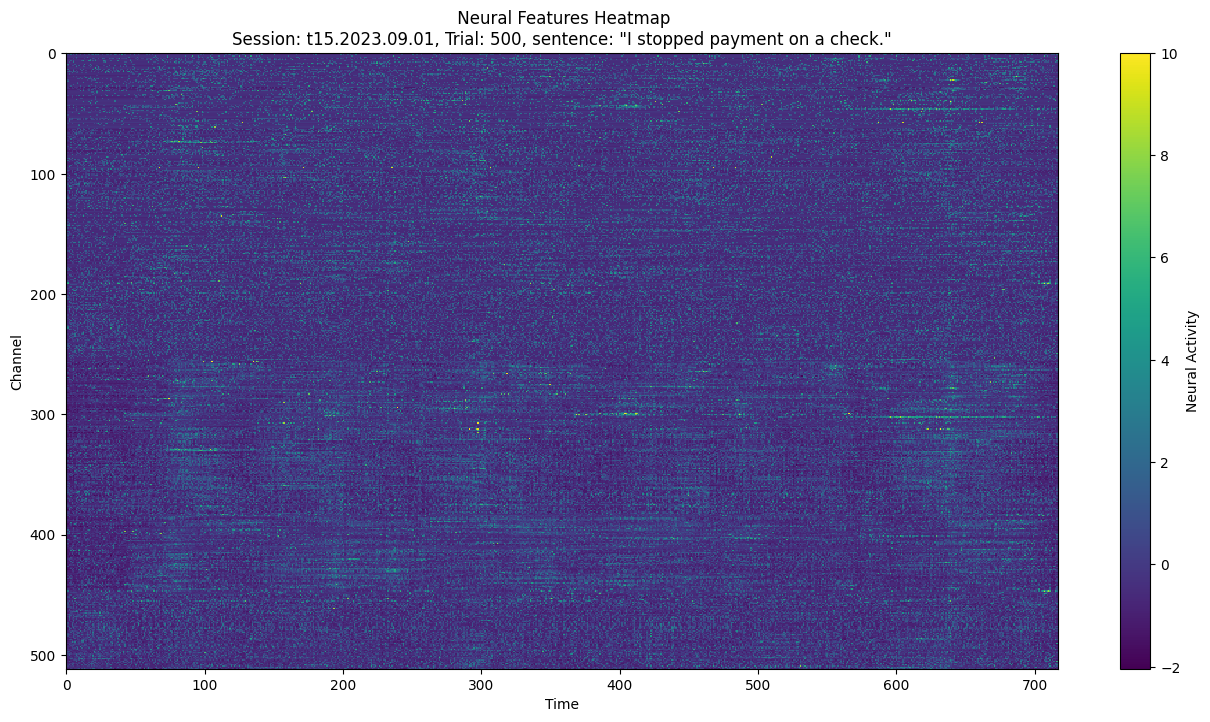

In [12]:
trl = 500  # 可以改成你想看的 trial 編號

features = np.array(train_df['neural_features'][trl])  # shape: (time, channel)

# 顯示該 trial 的基本資訊
print(f"session:      {train_df['session'][trl]}")
print(f"block_num:    {train_df['block_num'][trl]}")
print(f"trial_num:    {train_df['trial_num'][trl]}")
print(f"sentence:     {train_df['sentence_label'][trl]}")

# 畫出所有 channel 的 heatmap
plt.figure(figsize=(16, 8))
plt.imshow(features.T, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Neural Activity')
plt.ylabel('Channel')
plt.xlabel('Time')
plt.title(f" Neural Features Heatmap\nSession: {train_df['session'][trl]}, Trial: {trl}, sentence: \"{train_df['sentence_label'][trl]}\"")
plt.show()


In [13]:
# Concatenate all time points from all trials into a single (total_time_points, channel) matrix

all_features = [np.array(x) for x in train_df['neural_features']]
all_features_matrix = np.concatenate(all_features, axis=0)  # shape: (total_time, channel)
all_features_matrix.shape

(7061713, 512)

In [37]:
sample_n = 50000
idx = np.random.choice(all_features_matrix.shape[0], sample_n, replace=False)
all_features_matrix_sample = all_features_matrix[idx, :]

all_features_matrix_sample.shape

(50000, 512)

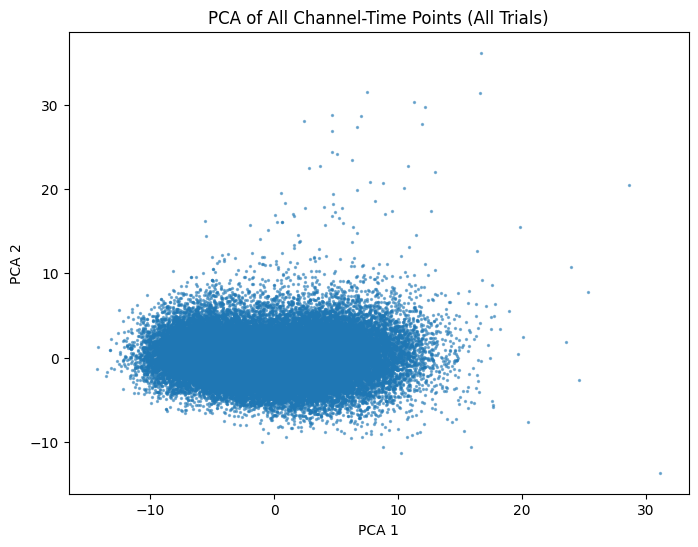

In [38]:
# Perform PCA on (channel, time) to analyze the distribution across channels
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='randomized')
pca_result = pca.fit_transform(all_features_matrix_sample)  # shape: (channel, 2)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], s=2, alpha=0.5)
plt.title('PCA of All Channel-Time Points (All Trials)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [47]:
# 查看每個 channel 在主成分上的貢獻

loadings = pca.components_

top_pca1 = np.argsort(np.abs(loadings[0, :]))[-10:]
top_pca2 = np.argsort(np.abs(loadings[1, :]))[-10:]

print("PCA 1 最重要的前 10 個 channel：")
for rank, idx in enumerate(top_pca1, 1):
    print(f"  {rank}. channel {idx}，貢獻 {loadings[0, idx]:.4f}")

print()

print("PCA 2 最重要的前 10 個 channel：")
for rank, idx in enumerate(top_pca2, 1):
    print(f"  {rank}. channel {idx}，貢獻 {loadings[1, idx]:.4f}")



PCA 1 最重要的前 10 個 channel：
  1. channel 391，貢獻 0.0914
  2. channel 389，貢獻 0.0920
  3. channel 276，貢獻 0.0930
  4. channel 424，貢獻 0.0933
  5. channel 355，貢獻 0.0951
  6. channel 439，貢獻 0.0960
  7. channel 353，貢獻 0.0963
  8. channel 406，貢獻 0.0983
  9. channel 431，貢獻 0.1046
  10. channel 423，貢獻 0.1098

PCA 2 最重要的前 10 個 channel：
  1. channel 481，貢獻 0.1188
  2. channel 475，貢獻 0.1199
  3. channel 466，貢獻 0.1222
  4. channel 490，貢獻 0.1226
  5. channel 498，貢獻 0.1232
  6. channel 467，貢獻 0.1252
  7. channel 474，貢獻 0.1303
  8. channel 491，貢獻 0.1477
  9. channel 483，貢獻 0.1530
  10. channel 482，貢獻 0.1646


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_n_clusters = 0
best_score = -1
best_labels = None

# 測試 2~10 群，選擇 Silhouette Score 最高的分群數
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(all_features_matrix_sample)
    score = silhouette_score(all_features_matrix_sample, labels)
    print(f"n_clusters={n}，Silhouette Score={score:.4f}")
    if score > best_score:
        best_score = score
        best_n_clusters = n
        best_labels = labels

print(f"\n最佳分群數量為 {best_n_clusters}，Silhouette Score={best_score:.4f}")
train_df['cluster'] = best_labels

print("每個分群的 trial 數量：")
print(train_df['cluster'].value_counts())

: 

: 